In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

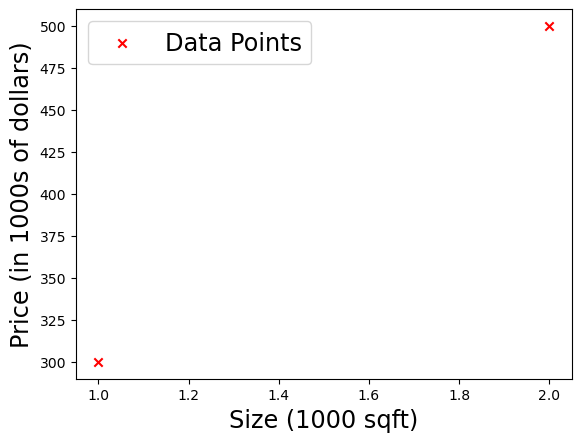

In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [3]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', ) #linear means leniar regression activation func

In [4]:
linear_layer.get_weights()


[]

In [13]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-1.4727294]], shape=(1, 1), dtype=float32)


In [15]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-1.4727294]], b=[0.]


In [16]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [18]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [21]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

In [23]:
print(prediction_tf)


tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)


In [25]:
print(prediction_np)

[[300.]
 [500.]]


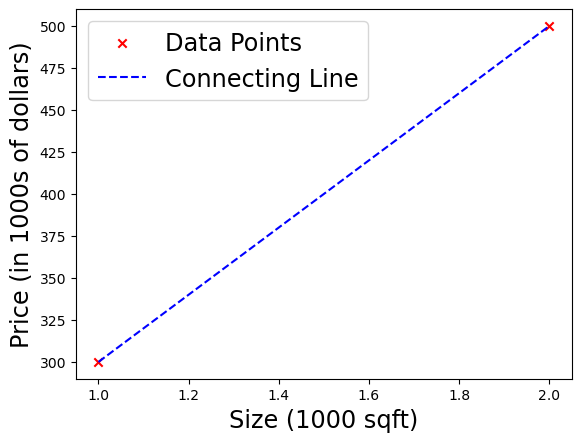

In [27]:
fig, ax = plt.subplots(1, 1)

# Scatter plot for data points
ax.scatter(X_train, prediction_tf, marker='x', c='r', label="Data Points")

# Line connecting all points
ax.plot(X_train, prediction_tf, linestyle='--', color='b', label="Connecting Line")

# Add legend, labels, and formatting
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')

# Display the plot
plt.show()

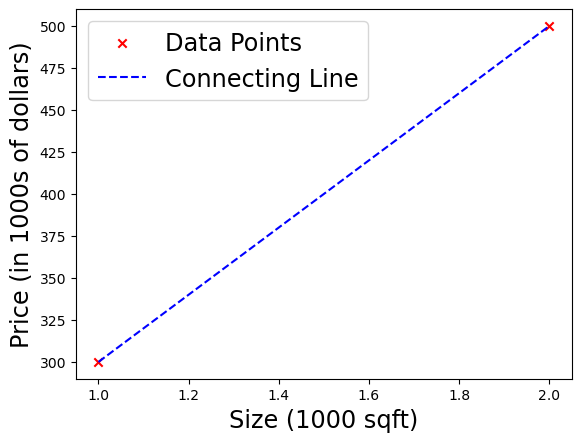

In [29]:
fig, ax = plt.subplots(1, 1)

# Scatter plot for data points
ax.scatter(X_train, prediction_np, marker='x', c='r', label="Data Points")

# Line connecting all points
ax.plot(X_train, prediction_tf, linestyle='--', color='b', label="Connecting Line")

# Add legend, labels, and formatting
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')

# Display the plot
plt.show()

# Neuron with Sigmoid activation

### dataset

In [31]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [51]:
pos = Y_train == 1
neg = Y_train == 0
print(pos)
X_train[pos]

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]]


array([3., 4., 5.], dtype=float32)

In [35]:
dlc = {
    "dlblue": "#1f77b4",  # A shade of blue
    "dlmagenta": "#ff7f0e"  # A shade of magenta
}

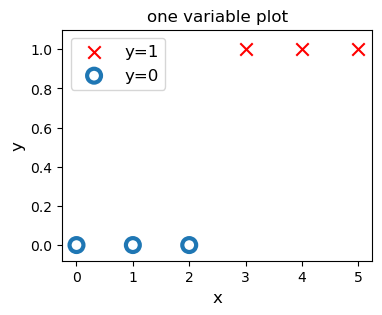

In [37]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

## Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [47]:
model = Sequential(
    [
        Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.05787003]] [0.]
(1, 1) (1,)


Let's set the weight and bias to some known values.

In [55]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [58]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
[[0.01098694]]


NameError: name 'sigmoidnp' is not defined